In [1]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np
import pandas as pd 

from keras import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
from sklearn.metrics import *
from keras.models import Sequential,Model
from keras.layers import *
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

Using TensorFlow backend.


In [2]:
data = pd .read_csv('voice.csv')

In [3]:
data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [4]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [5]:
label_value_count = data.label.value_counts()
print(label_value_count)
print(data.info())

female    1584
male      1584
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   316

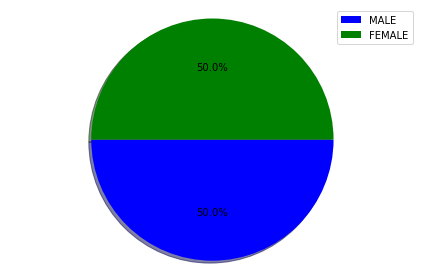

1    1584
0    1584
Name: label, dtype: int64


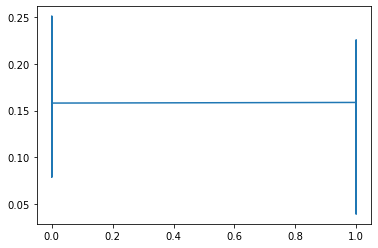

In [25]:
import matplotlib.pyplot as plt
labels = ['MALE', 'FEMALE']
colors = ['blue','green']
plt.pie(data.label.value_counts(), colors=colors, shadow=True, startangle=180,autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
label_value_count = data.label.value_counts()
print(label_value_count)
plt.plot(data.label,data.meanfreq)

In [7]:
# Convert string label to float : male = 1, female = 0
dict = {'label':{'male':1,'female':0}}      # label = column name
data.replace(dict,inplace = True)           # replace = str to numerical
x = data.loc[:, data.columns != 'label']
y = data.loc[:,'label']

In [8]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [10]:
x = x.values
y = y.values

In [11]:
from sklearn.utils import shuffle
x, y = shuffle(x, y, random_state=1010101)

In [12]:
trainX = x[:int(len(x) * 0.7)]
trainY = y[:int(len(y) * 0.7)]
validateX = x[int(len(x) * 0.7) : int(len(x) * 0.9)]
validateY = y[int(len(y) * 0.7) : int(len(y) * 0.9)]
testX = x[int(len(x) * 0.9):]
testY = y[int(len(y) * 0.9):]
print (len(trainX))
print (len(validateX))
print (len(testX))

2217
634
317


In [13]:
trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [14]:
print (trainX.shape)

(2217, 20)


In [15]:
model = Sequential()
model.add(Dense(len(trainX[0]), input_dim=len(trainX[0]), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(trainX, trainY, epochs=1000, batch_size=1000, validation_data = (validateX, validateY))




Train on 2217 samples, validate on 634 samples
Epoch 1/1000





2217/2217 [==============================] - 1s 295us/step - loss: 0.2758 - acc: 0.5129 - val_loss: 0.2543 - val_acc: 0.4968
Epoch 2/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2508 - acc: 0.5232 - val_loss: 0.2586 - val_acc: 0.5000
Epoch 3/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.2572 - acc: 0.5138 - val_loss: 0.2535 - val_acc: 0.4890
Epoch 4/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2535 - acc: 0.5232 - val_loss: 0.2649 - val_acc: 0.6183
Epoch 5/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.2624 - acc: 0.5981 - val_loss: 0.2607 - val_acc: 0.5647
Epoch 6/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2548 - acc: 0.5449 - val_loss: 0.2547 - val_acc: 0.4858
Epoch 7/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.2500 - acc: 0.5250 - val_loss: 0.2536 - v

Epoch 48/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2122 - acc: 0.6937 - val_loss: 0.2063 - val_acc: 0.6640
Epoch 49/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2084 - acc: 0.6874 - val_loss: 0.2012 - val_acc: 0.6735
Epoch 50/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.2017 - acc: 0.6987 - val_loss: 0.1938 - val_acc: 0.7003
Epoch 51/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.1993 - acc: 0.6906 - val_loss: 0.1967 - val_acc: 0.6909
Epoch 52/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2021 - acc: 0.6775 - val_loss: 0.1933 - val_acc: 0.6893
Epoch 53/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2010 - acc: 0.7028 - val_loss: 0.2010 - val_acc: 0.6719
Epoch 54/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.2042 - acc: 0.6951 - val_loss: 0.2023 - val_acc: 0.6719
Epoch 55/1000
2217/2217 [=========

2217/2217 [==============================] - 0s 14us/step - loss: 0.1386 - acc: 0.8232 - val_loss: 0.1392 - val_acc: 0.8170
Epoch 108/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.1377 - acc: 0.8241 - val_loss: 0.1366 - val_acc: 0.8170
Epoch 109/1000
2217/2217 [==============================] - 0s 19us/step - loss: 0.1372 - acc: 0.8241 - val_loss: 0.1463 - val_acc: 0.8044
Epoch 110/1000
2217/2217 [==============================] - 0s 16us/step - loss: 0.1544 - acc: 0.7930 - val_loss: 0.1734 - val_acc: 0.7571
Epoch 111/1000
2217/2217 [==============================] - 0s 15us/step - loss: 0.1720 - acc: 0.7695 - val_loss: 0.1939 - val_acc: 0.7397
Epoch 112/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.1757 - acc: 0.7745 - val_loss: 0.1705 - val_acc: 0.7792
Epoch 113/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.1659 - acc: 0.7916 - val_loss: 0.1667 - val_acc: 0.7666
Epoch 114/1000
2217/2217 [================

2217/2217 [==============================] - 0s 21us/step - loss: 0.1017 - acc: 0.8714 - val_loss: 0.0989 - val_acc: 0.8707
Epoch 167/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.1109 - acc: 0.8692 - val_loss: 0.1339 - val_acc: 0.8186
Epoch 168/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.1379 - acc: 0.8173 - val_loss: 0.1603 - val_acc: 0.7965
Epoch 169/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.1454 - acc: 0.8137 - val_loss: 0.1435 - val_acc: 0.8297
Epoch 170/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.1312 - acc: 0.8444 - val_loss: 0.1326 - val_acc: 0.8281
Epoch 171/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.1255 - acc: 0.8498 - val_loss: 0.1303 - val_acc: 0.8202
Epoch 172/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.1248 - acc: 0.8399 - val_loss: 0.1204 - val_acc: 0.8328
Epoch 173/1000
2217/2217 [================

2217/2217 [==============================] - 0s 14us/step - loss: 0.0810 - acc: 0.9030 - val_loss: 0.0760 - val_acc: 0.9022
Epoch 226/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0761 - acc: 0.9075 - val_loss: 0.0845 - val_acc: 0.8975
Epoch 227/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0777 - acc: 0.9075 - val_loss: 0.0739 - val_acc: 0.9132
Epoch 228/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0701 - acc: 0.9233 - val_loss: 0.0737 - val_acc: 0.9164
Epoch 229/1000
2217/2217 [==============================] - 0s 24us/step - loss: 0.0728 - acc: 0.9233 - val_loss: 0.0779 - val_acc: 0.9132
Epoch 230/1000
2217/2217 [==============================] - 0s 18us/step - loss: 0.0752 - acc: 0.9175 - val_loss: 0.0821 - val_acc: 0.9085
Epoch 231/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0700 - acc: 0.9314 - val_loss: 0.0692 - val_acc: 0.9211
Epoch 232/1000
2217/2217 [================

2217/2217 [==============================] - 0s 14us/step - loss: 0.0834 - acc: 0.9062 - val_loss: 0.0769 - val_acc: 0.9132
Epoch 285/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0774 - acc: 0.9134 - val_loss: 0.0725 - val_acc: 0.9148
Epoch 286/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0728 - acc: 0.9197 - val_loss: 0.0791 - val_acc: 0.9132
Epoch 287/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0666 - acc: 0.9283 - val_loss: 0.0625 - val_acc: 0.9274
Epoch 288/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0629 - acc: 0.9238 - val_loss: 0.0630 - val_acc: 0.9211
Epoch 289/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0628 - acc: 0.9292 - val_loss: 0.0592 - val_acc: 0.9274
Epoch 290/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0581 - acc: 0.9256 - val_loss: 0.0579 - val_acc: 0.9401
Epoch 291/1000
2217/2217 [================

2217/2217 [==============================] - 0s 21us/step - loss: 0.1275 - acc: 0.8521 - val_loss: 0.1181 - val_acc: 0.8628
Epoch 343/1000
2217/2217 [==============================] - ETA: 0s - loss: 0.1170 - acc: 0.866 - 0s 14us/step - loss: 0.1087 - acc: 0.8714 - val_loss: 0.1404 - val_acc: 0.8281
Epoch 344/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.1158 - acc: 0.8597 - val_loss: 0.1214 - val_acc: 0.8580
Epoch 345/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.1102 - acc: 0.8701 - val_loss: 0.1165 - val_acc: 0.8628
Epoch 346/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.1018 - acc: 0.8818 - val_loss: 0.1186 - val_acc: 0.8644
Epoch 347/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.1019 - acc: 0.8832 - val_loss: 0.1161 - val_acc: 0.8580
Epoch 348/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0997 - acc: 0.8859 - val_loss: 0.1114 - val_acc: 0.8707
Epoc

2217/2217 [==============================] - 0s 14us/step - loss: 0.0424 - acc: 0.9553 - val_loss: 0.0434 - val_acc: 0.9464
Epoch 401/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0403 - acc: 0.9535 - val_loss: 0.0413 - val_acc: 0.9558
Epoch 402/1000
2217/2217 [==============================] - 0s 17us/step - loss: 0.0375 - acc: 0.9612 - val_loss: 0.0411 - val_acc: 0.9543
Epoch 403/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0389 - acc: 0.9594 - val_loss: 0.0419 - val_acc: 0.9511
Epoch 404/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0412 - acc: 0.9535 - val_loss: 0.0588 - val_acc: 0.9401
Epoch 405/1000
2217/2217 [==============================] - 0s 15us/step - loss: 0.1024 - acc: 0.8746 - val_loss: 0.2346 - val_acc: 0.7161
Epoch 406/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.2301 - acc: 0.7212 - val_loss: 0.2447 - val_acc: 0.7145
Epoch 407/1000
2217/2217 [================

2217/2217 [==============================] - 0s 21us/step - loss: 0.0492 - acc: 0.9454 - val_loss: 0.0520 - val_acc: 0.9385
Epoch 460/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0492 - acc: 0.9490 - val_loss: 0.0507 - val_acc: 0.9416
Epoch 461/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0469 - acc: 0.9526 - val_loss: 0.0489 - val_acc: 0.9416
Epoch 462/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0460 - acc: 0.9508 - val_loss: 0.0497 - val_acc: 0.9464
Epoch 463/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0455 - acc: 0.9522 - val_loss: 0.0443 - val_acc: 0.9495
Epoch 464/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0420 - acc: 0.9553 - val_loss: 0.0436 - val_acc: 0.9448
Epoch 465/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0409 - acc: 0.9558 - val_loss: 0.0419 - val_acc: 0.9511
Epoch 466/1000
2217/2217 [================

Epoch 518/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0470 - acc: 0.9486 - val_loss: 0.0496 - val_acc: 0.9401
Epoch 519/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0457 - acc: 0.9508 - val_loss: 0.0475 - val_acc: 0.9464
Epoch 520/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0440 - acc: 0.9531 - val_loss: 0.0459 - val_acc: 0.9416
Epoch 521/1000
2217/2217 [==============================] - 0s 18us/step - loss: 0.0427 - acc: 0.9549 - val_loss: 0.0466 - val_acc: 0.9448
Epoch 522/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0425 - acc: 0.9558 - val_loss: 0.0406 - val_acc: 0.9543
Epoch 523/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0380 - acc: 0.9599 - val_loss: 0.0413 - val_acc: 0.9479
Epoch 524/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0405 - acc: 0.9558 - val_loss: 0.0382 - val_acc: 0.9558
Epoch 525/1000
2217/2217 [=

2217/2217 [==============================] - 0s 14us/step - loss: 0.0900 - acc: 0.8981 - val_loss: 0.1091 - val_acc: 0.8833
Epoch 577/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0922 - acc: 0.8954 - val_loss: 0.0996 - val_acc: 0.8880
Epoch 578/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0846 - acc: 0.9057 - val_loss: 0.0975 - val_acc: 0.8896
Epoch 579/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0822 - acc: 0.9057 - val_loss: 0.0921 - val_acc: 0.8991
Epoch 580/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0776 - acc: 0.9143 - val_loss: 0.0894 - val_acc: 0.9006
Epoch 581/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0750 - acc: 0.9161 - val_loss: 0.0874 - val_acc: 0.9069
Epoch 582/1000
2217/2217 [==============================] - 0s 16us/step - loss: 0.0753 - acc: 0.9147 - val_loss: 0.0828 - val_acc: 0.9069
Epoch 583/1000
2217/2217 [================

2217/2217 [==============================] - 0s 20us/step - loss: 0.0481 - acc: 0.9495 - val_loss: 0.0515 - val_acc: 0.9385
Epoch 636/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0473 - acc: 0.9499 - val_loss: 0.0493 - val_acc: 0.9385
Epoch 637/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0465 - acc: 0.9490 - val_loss: 0.0478 - val_acc: 0.9401
Epoch 638/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0454 - acc: 0.9513 - val_loss: 0.0479 - val_acc: 0.9448
Epoch 639/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0450 - acc: 0.9517 - val_loss: 0.0461 - val_acc: 0.9448
Epoch 640/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0443 - acc: 0.9504 - val_loss: 0.0451 - val_acc: 0.9479
Epoch 641/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0438 - acc: 0.9499 - val_loss: 0.0450 - val_acc: 0.9464
Epoch 642/1000
2217/2217 [================

Epoch 694/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0466 - acc: 0.9508 - val_loss: 0.0509 - val_acc: 0.9448
Epoch 695/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0457 - acc: 0.9522 - val_loss: 0.0475 - val_acc: 0.9479
Epoch 696/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0445 - acc: 0.9495 - val_loss: 0.0462 - val_acc: 0.9448
Epoch 697/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0430 - acc: 0.9535 - val_loss: 0.0472 - val_acc: 0.9495
Epoch 698/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0419 - acc: 0.9544 - val_loss: 0.0444 - val_acc: 0.9479
Epoch 699/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0406 - acc: 0.9558 - val_loss: 0.0428 - val_acc: 0.9479
Epoch 700/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0397 - acc: 0.9571 - val_loss: 0.0424 - val_acc: 0.9479
Epoch 701/1000
2217/2217 [=

Epoch 753/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0674 - acc: 0.9269 - val_loss: 0.0400 - val_acc: 0.9464
Epoch 754/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0588 - acc: 0.9314 - val_loss: 0.0791 - val_acc: 0.9069
Epoch 755/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0868 - acc: 0.9035 - val_loss: 0.0652 - val_acc: 0.9243
Epoch 756/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0729 - acc: 0.9175 - val_loss: 0.0536 - val_acc: 0.9401
Epoch 757/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0513 - acc: 0.9378 - val_loss: 0.0624 - val_acc: 0.9227
Epoch 758/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0707 - acc: 0.9188 - val_loss: 0.0560 - val_acc: 0.9338
Epoch 759/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0547 - acc: 0.9369 - val_loss: 0.0517 - val_acc: 0.9306
Epoch 760/1000
2217/2217 [=

Epoch 812/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0836 - acc: 0.9071 - val_loss: 0.1018 - val_acc: 0.8927
Epoch 813/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0819 - acc: 0.9089 - val_loss: 0.1001 - val_acc: 0.8959
Epoch 814/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0800 - acc: 0.9102 - val_loss: 0.0991 - val_acc: 0.8943
Epoch 815/1000
2217/2217 [==============================] - 0s 35us/step - loss: 0.0779 - acc: 0.9134 - val_loss: 0.0985 - val_acc: 0.8927
Epoch 816/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0769 - acc: 0.9152 - val_loss: 0.0963 - val_acc: 0.8927
Epoch 817/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0758 - acc: 0.9143 - val_loss: 0.0948 - val_acc: 0.8943
Epoch 818/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0760 - acc: 0.9134 - val_loss: 0.0933 - val_acc: 0.8927
Epoch 819/1000
2217/2217 [=

Epoch 871/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0380 - acc: 0.9603 - val_loss: 0.0401 - val_acc: 0.9511
Epoch 872/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0376 - acc: 0.9612 - val_loss: 0.0396 - val_acc: 0.9527
Epoch 873/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0373 - acc: 0.9599 - val_loss: 0.0393 - val_acc: 0.9511
Epoch 874/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0369 - acc: 0.9608 - val_loss: 0.0393 - val_acc: 0.9527
Epoch 875/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0366 - acc: 0.9621 - val_loss: 0.0386 - val_acc: 0.9558
Epoch 876/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0361 - acc: 0.9630 - val_loss: 0.0362 - val_acc: 0.9558
Epoch 877/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0343 - acc: 0.9644 - val_loss: 0.0358 - val_acc: 0.9606
Epoch 878/1000
2217/2217 [=

2217/2217 [==============================] - 0s 21us/step - loss: 0.0418 - acc: 0.9562 - val_loss: 0.0447 - val_acc: 0.9464
Epoch 930/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0418 - acc: 0.9558 - val_loss: 0.0444 - val_acc: 0.9448
Epoch 931/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0413 - acc: 0.9562 - val_loss: 0.0443 - val_acc: 0.9448
Epoch 932/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0410 - acc: 0.9571 - val_loss: 0.0436 - val_acc: 0.9464
Epoch 933/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0415 - acc: 0.9553 - val_loss: 0.0433 - val_acc: 0.9495
Epoch 934/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0407 - acc: 0.9571 - val_loss: 0.0437 - val_acc: 0.9495
Epoch 935/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0412 - acc: 0.9558 - val_loss: 0.0434 - val_acc: 0.9511
Epoch 936/1000
2217/2217 [================

2217/2217 [==============================] - 0s 14us/step - loss: 0.0428 - acc: 0.9553 - val_loss: 0.0475 - val_acc: 0.9464
Epoch 989/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0433 - acc: 0.9544 - val_loss: 0.0461 - val_acc: 0.9479
Epoch 990/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0422 - acc: 0.9562 - val_loss: 0.0458 - val_acc: 0.9479
Epoch 991/1000
2217/2217 [==============================] - 0s 14us/step - loss: 0.0427 - acc: 0.9553 - val_loss: 0.0456 - val_acc: 0.9448
Epoch 992/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0421 - acc: 0.9571 - val_loss: 0.0456 - val_acc: 0.9448
Epoch 993/1000
2217/2217 [==============================] - 0s 21us/step - loss: 0.0416 - acc: 0.9585 - val_loss: 0.0452 - val_acc: 0.9448
Epoch 994/1000
2217/2217 [==============================] - 0s 17us/step - loss: 0.0415 - acc: 0.9576 - val_loss: 0.0450 - val_acc: 0.9448
Epoch 995/1000
2217/2217 [================

In [18]:
predictions = model.predict(testX)

In [19]:
prob = []
limit_prob = []

for k in range(len(predictions)):
    prob.append(round(predictions[k][0], 4))
    if round(predictions[k][0], 4) > 0.5:
        limit_prob.append(1)
    else:
        limit_prob.append(0)

In [20]:
my_submission = pd.DataFrame({'real': testY, 'prediction': prob, 'limit prediction' : limit_prob})
# you could use any filename. We choose submission here
my_submission.to_csv('sample_submission1.csv', index=False)

In [21]:
print("0 is for FEMALE and 1 is for MALE")
print(my_submission.head(50))

0 is for FEMALE and 1 is for MALE
    real  prediction  limit prediction
0      0      0.0003                 0
1      1      0.9946                 1
2      1      1.0000                 1
3      1      0.9950                 1
4      1      0.9921                 1
5      1      0.9362                 1
6      1      0.9916                 1
7      0      0.0002                 0
8      0      0.0000                 0
9      1      0.9017                 1
10     1      0.9529                 1
11     1      0.9657                 1
12     1      0.9954                 1
13     1      0.0040                 0
14     1      1.0000                 1
15     1      0.9837                 1
16     1      1.0000                 1
17     0      0.0010                 0
18     0      0.0007                 0
19     0      0.0040                 0
20     1      1.0000                 1
21     0      0.0787                 0
22     0      0.0000                 0
23     0      0.0000          